<a href="https://colab.research.google.com/github/PhaTanVu/AI_24-02/blob/main/Baitap_Conlac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-2-fef897dcea99>:53: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-2-fef897dcea99>:54: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-2-fef897dcea99>:55: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)


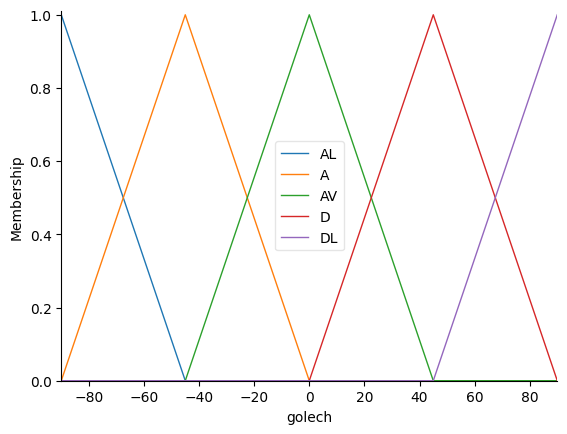

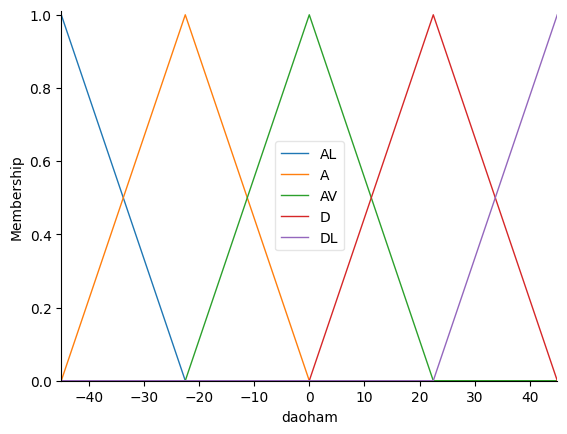

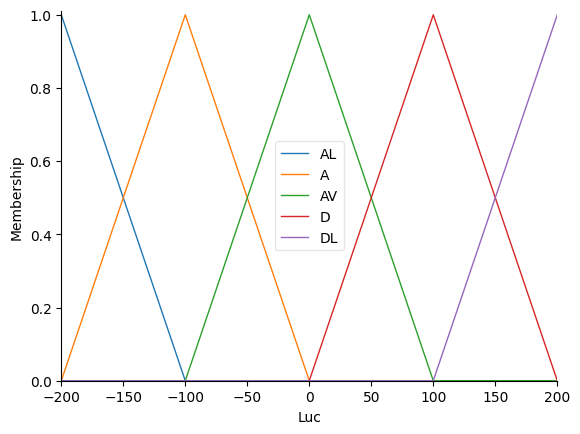

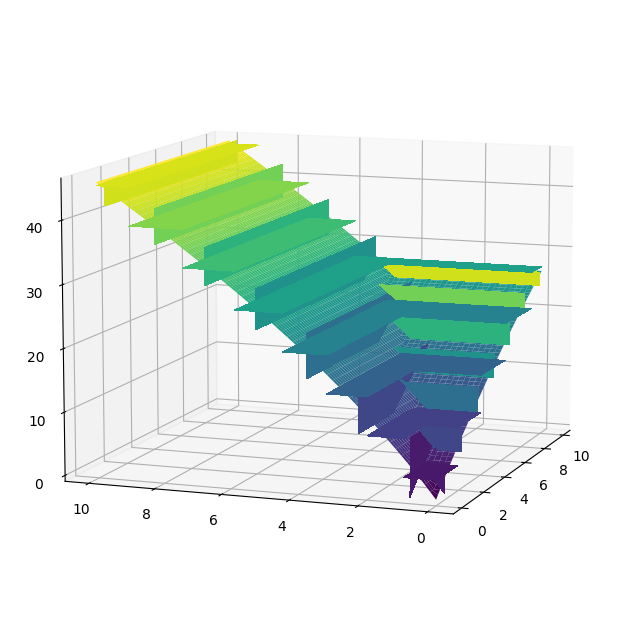

In [2]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import math

enpha = np.linspace(-90,90,61) # chia khoang 0-10 thanh 61 phan thuw
daohamenpha = np.linspace(-45,45,61)
luc = np.linspace(-200,200,61)

enpha = ctrl.Antecedent(enpha,'golech')
daohamenpha = ctrl.Antecedent(daohamenpha,'daoham')
luc = ctrl.Consequent(luc,'Luc')

names = ['AL','A','AV','D','DL'] # gia tri phai la le 
enpha.automf(names=names) # chia khoan cho tung bieu do ten dg bieu do
daohamenpha.automf(names=names)
luc.automf(names=names)

enpha.view()
daohamenpha.view()
luc.view() #cho hien thi

#lam luat
rule0 = ctrl.Rule(antecedent=((enpha['AL']&daohamenpha['AL'])|(enpha['A']&daohamenpha['AL'])|(enpha['AL']&daohamenpha['DL'])|(enpha['AL']&daohamenpha['D'])),consequent=luc['AL'], label= 'rule AL')  #khúc này làm luật
rule1 = ctrl.Rule(antecedent=((enpha['AV']&daohamenpha['AL'])|(enpha['A']&daohamenpha['A'])|(enpha['AL']&daohamenpha['A'])|(enpha['A']&daohamenpha['AV'])|(enpha['A']&daohamenpha['D'])),consequent=luc['A'], label= 'rule A')
rule2 = ctrl.Rule(antecedent=((enpha['D']&daohamenpha['AL'])|(enpha['DL']&daohamenpha['AL'])|(enpha['AV']&daohamenpha['A'])|(enpha['D']&daohamenpha['A'])|(enpha['AV']&daohamenpha['AV'])|(enpha['A']&daohamenpha['DL']))
,consequent=luc['AV'], label= 'rule AV')



rule3 = ctrl.Rule(antecedent=((enpha['DL']&daohamenpha['A'])|(enpha['D']&daohamenpha['AV'])|(enpha['D']&daohamenpha['D'])|(enpha['AV']&daohamenpha['D'])|(enpha['AV']&daohamenpha['DL'])),consequent=luc['D'], label= 'rule D')
rule4 = ctrl.Rule(antecedent=((enpha['DL']&daohamenpha['AV'])|(enpha['DL']&daohamenpha['DL'])|(enpha['D']&daohamenpha['DL'])),consequent=luc['DL'], label= 'rule DL')

system = ctrl.ControlSystem(rules=[rule0,rule1,rule2, rule3, rule4])
sim = ctrl.ControlSystemSimulation(system, flush_after_run= 61*61+1)
upsampled = np.linspace(00,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['golech'] = x[i,j]
    sim.input['daoham'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Luc']
#phan hien thi
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(10,200)